In [1]:
import gym
import numpy as np
import time
from IPython import display
import or_gym
import random

In [5]:
env_name = 'InvManagement-v3'

env = or_gym.make(
    env_name, 
    calculate_mdp = True,
    # max_inventory = 20, 
    # max_order_quantity = 10,
    # step_limit= 100,
    # p_max= 5,    # Max sale price,
    # h_max= 10,     # Max holding cost,
    # k_max= 3,    # Max lost sales penalty,
    # mu_max= 10 
)

print(env.action_space)
print(env.observation_space)

Box([0 0 0 0 0 0], [2 2 2 2 2 2], (6,), int32)
Box([0 0 0 0 0], [5 5 5 5 5], (5,), int32)


In [3]:
# P_[tuple(env.observation_space.sample())][tuple(env.action_space.sample())]
# P_[tuple(env.observation_space.sample())]
sample_obs = tuple(env.observation_space.sample())
sample_action = tuple(env.action_space.sample())
print(sample_obs)
print(sample_action)
print(env.MDP[sample_obs][sample_action])

(1, 0, 3, 1, 4)
(2, 2, 1, 2, 1, 0)
((3, 1, 4, 0, 2), 1.7000000000000002)


In [4]:
env.MDP[sample_obs][sample_action]

((3, 1, 4, 0, 2), 1.7000000000000002)

1 [0]
2 [1]
(2, 1) 0.0
3 [1]
(3, 1) 0.0
4 [2]
(4, 2) 0.0
5 [3]
(5, 3) 0.0
6 [5 4]


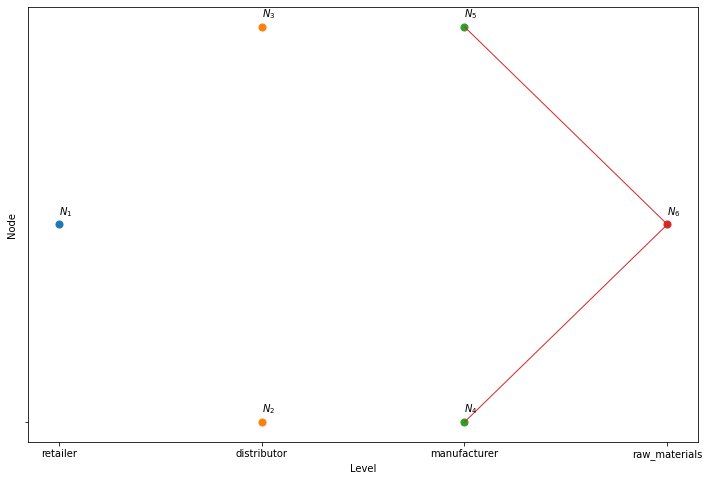

In [6]:
# max(0, sample[env.reorder_links.index((3, 2))]) * 2
# env.getMDPSold(action, 2, 1)
env.plot_network()

## Value Iteration

In [7]:
import value_iteration
from importlib import reload
reload(value_iteration)
v_values = value_iteration.value_iteration_box(env, max_iters=1000, gamma=0.9, theta=0.1)
# v_values

Converged at 29-th iteration.


In [8]:
policy = value_iteration.policy_extraction_box(env, v_values, gamma=1)
policy

{(0, 0, 0, 0, 0): (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1): (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 2): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 3): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 4): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 5): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0): (0, 0, 1, 0, 0, 1),
 (0, 0, 0, 1, 1): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 2): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 3): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 4): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 5): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 2, 0): (0, 0, 1, 0, 0, 0),
 (0, 0, 0, 2, 1): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 2, 2): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 2, 3): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 2, 4): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 2, 5): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 3, 0): (0, 0, 1, 0, 0, 0),
 (0, 0, 0, 3, 1): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 3, 2): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 3, 3): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 3, 4): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 3, 5): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 4, 0): (0, 0, 1, 0, 0, 0),
 (0, 0, 0, 4, 1): (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 4

In [8]:
# Policy should show orders from the nodes that have inventories to move goods through the chain 
# There should be no orders where a inventories = 0, as that will incur a goodwill penalty
policy[(1,0,1,0,1)] 

(0, 1, 0, 1, 0, 1)

In [23]:
from play import *
play_env = or_gym.make(
    env_name, 
    calculate_mdp = False,
    # max_inventory = 20, 
    # max_order_quantity = 10,
    # step_limit= 100,
    # p_max= 5,    # Max sale price,
    # h_max= 10,     # Max holding cost,
    # k_max= 3,    # Max lost sales penalty,
    # mu_max= 10 
)

In [24]:

print(play(play_env, policy))
play_multiple_times(play_env, policy, 10)

46.26399999999998


45.186090000000014

In [35]:
import matplotlib.pyplot as plt
def plot_network(env):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    adjacency_matrix = np.vstack(env.graph.edges())
    # Set level colors
    level_col = {'retailer': 0,
                'distributor': 1,
                'manufacturer': 2,
                'raw_materials': 3}

    max_density = np.max([len(v) for v in env.levels.values()])
    node_coords = {}
    node_num = 1
    plt.figure(figsize=(12,8))
    for i, (level, nodes) in enumerate(env.levels.items()):
        n = len(nodes)
        node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
        node_y = np.atleast_1d(node_y)
        plt.scatter(np.repeat(i, n), node_y, label=level, s=50)
        for y in node_y:
            plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
            node_coords[node_num] = (i, y)
            node_num += 1

    # Draw edges
    for node_num, v in node_coords.items():
        x, y = v
        # print(x, y)
        sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
        for s in sinks:
            try:
                sink_coord = node_coords[s]
            except KeyError:
                continue
            # if node_num in env.main_nodes and s in env.main_nodes:
            # if s == 4:
                # average_orders = np.average(env.R.loc[:,(0, s)]) * 3
            # else:
            print((node_num, s), sum(env.R.loc[:,(node_num, s)]))
            average_orders = np.average(env.R.loc[:,(node_num, s)]) * 3
            print((node_num, s), average_orders)
            line_width = average_orders
            # else:
            #     line_width = 1

            for k, n in env.levels.items():
                if node_num in n:
                    color = colors[level_col[k]]
            x_ = np.hstack([x, sink_coord[0]])
            y_ = np.hstack([y, sink_coord[1]])
            plt.plot(x_, y_, color=color, linewidth=line_width)

    plt.ylabel('Node')
    plt.yticks([0], [''])
    plt.xlabel('Level')
    plt.xticks(np.arange(len(env.levels)), [k for k in env.levels.keys()])
    plt.show()

KeyError: (1, 0)

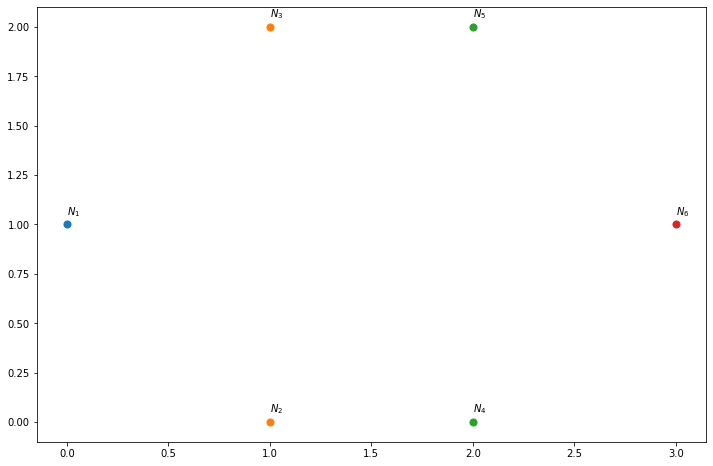

In [36]:
plot_network(play_env)

In [34]:
play_env.R.columns

MultiIndex([(2, 1),
            (3, 1),
            (4, 2),
            (5, 3),
            (6, 5),
            (6, 4)],
           names=['Supplier', 'Requester'])

## Policy Iteration

In [4]:
import policy_iteration
from importlib import reload
reload(policy_iteration)

policy_iter_policy = policy_iteration.policy_iteration_box(env, max_iters=1000, gamma=0.9, theta=0.1)
policy_iter_policy

KeyError: (0, 0, 0, 0, 0)

In [13]:
policy_iter_policy[(1,0,1,0,1)] 

(0, 1, 0, 1, 0, 1)

In [14]:
play_env_2 = or_gym.make(
    env_name, 
    calculate_mdp = False,
    # max_inventory = 20, 
    # max_order_quantity = 10,
    # step_limit= 100,
    # p_max= 5,    # Max sale price,
    # h_max= 10,     # Max holding cost,
    # k_max= 3,    # Max lost sales penalty,
    # mu_max= 10 
)
print(play(play_env_2, policy_iter_policy))
play_multiple_times(play_env_2, policy_iter_policy, 100)

46.28999999999998


45.26943

In [ ]:
play_env_2.plot_network()

In [15]:
shared_items = {k: policy[k] for k in policy if k in policy_iter_policy and policy[k] == policy_iter_policy[k]}
print((len(shared_items) / float(len(policy))))

0.9895833333333334


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(policy_iter_policy.values(), policy.values())

TypeError: float() argument must be a string or a number, not 'dict_values'

## PPO

In [ ]:
import or_gym
from or_gym.utils import create_env
import ray
import ray.rllib.agents.ppo as ppo
from ray import tune
from ppo import *

debug = False
sample_cpu = 12
sample_gpu = 0

def register_env(env_name, env_config={}):
    env = create_env(env_name)
    tune.register_env(env_name, 
        lambda env_name: env(env_name,
            env_config=env_config))

In [ ]:
env_name = 'InvManagement-v3'
env = or_gym.make(env_name, calculate_mdp = False)
print(env.action_space)
print(env.observation_space)

[(2, 1), (3, 1), (4, 2), (5, 3), (6, 5), (6, 4)]
Box([0 0 0 0 0 0], [2 2 2 2 2 2], (6,), int32)
Box([0 0 0 0 0], [5 5 5 5 5], (5,), int32)


In [ ]:
env_config = {'calculate_mdp': False, }       
#     'lead_time': 10,
#     'max_inventory': 2000,
#     'max_order_quantity': 200,
#     'step_limit': 100,
#     'p_max': 100,    # Max sale price,
#     'h_max': 5 ,     # Max holding cost,
#     'k_max': 100 ,    # Max lost sales penalty,
#     'mu_max': 100  , # Max mean of the demand distribution,
# }

# Register environment
register_env(env_name, env_config)

rl_config['env'] = env_name
rl_config['env_config'] = env_config
rl_config['callbacks'] = None

In [ ]:

# Initialize Ray and Build Agent
ray.init(ignore_reinit_error=True)
agent = ppo.PPOTrainer(env=env_name,
    config=rl_config)
 
results = []
for i in range(200):
    res = agent.train()
    results.append(res)
    if (i+1) % 5 == 0:
        print('\rIter: {}\tReward: {:.2f}'.format(
                i+1, res['episode_reward_mean']), end='')
ray.shutdown()

2022-04-16 18:18:11,315	INFO ppo.py:249 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
(RolloutWorker pid=28482) 2022-04-16 18:18:15,410	INFO rollout_worker.py:1729 -- Validating sub-env at vector index=0 ... (ok)
(RolloutWorker pid=28482) 2022-04-16 18:18:15,417	INFO torch_policy.py:162 -- TorchPolicy (worker=2) running on CPU.
(RolloutWorker pid=28489) 2022-04-16 18:18:15,384	INFO rollout_worker.py:1729 -- Validating sub-env at vector index=0 ... (ok)
(RolloutWorker pid=28489) 2022-04-16 18:18:15,392	INFO torch_policy.py:162 -- TorchPolicy (worker=4) running on CPU.
(RolloutWorker pid=28490) 2022-04-16 18:18:15,401	INFO rollout_worker.py:1729 -- Validating sub-env at vector index=0 ... (ok)
(RolloutWorker pid=28490) 2022-04-16 18:18:15,408	INFO torch_policy.py:162 -- TorchPolicy (worker=1) running on CPU.
(RolloutWorker pid=28491) 2022-04-16 18:18:15,462	INFO rollout_work

(RolloutWorker pid=28489) [(2, 1), (3, 1), (4, 2), (5, 3), (6, 5), (6, 4)]
(RolloutWorker pid=28482) [(2, 1), (3, 1), (4, 2), (5, 3), (6, 5), (6, 4)]
(RolloutWorker pid=28490) [(2, 1), (3, 1), (4, 2), (5, 3), (6, 5), (6, 4)]
(RolloutWorker pid=28491) [(2, 1), (3, 1), (4, 2), (5, 3), (6, 5), (6, 4)]
(RolloutWorker pid=28493) [(2, 1), (3, 1), (4, 2), (5, 3), (6, 5), (6, 4)]


(RolloutWorker pid=28490) 2022-04-16 18:18:15,678	INFO rollout_worker.py:756 -- Generating sample batch of size 200
(RolloutWorker pid=28490) 2022-04-16 18:18:15,684	INFO sampler.py:625 -- Raw obs from env: { 0: { 'agent0': np.ndarray((5,), dtype=float64, min=2.0, max=4.0, mean=3.0)}}
(RolloutWorker pid=28490) 2022-04-16 18:18:15,684	INFO sampler.py:627 -- Info return from env: {0: {'agent0': None}}
(RolloutWorker pid=28490) 2022-04-16 18:18:15,684	INFO sampler.py:854 -- Preprocessed obs: np.ndarray((5,), dtype=float64, min=2.0, max=4.0, mean=3.0)
(RolloutWorker pid=28490) 2022-04-16 18:18:15,684	INFO sampler.py:859 -- Filtered obs: np.ndarray((5,), dtype=float64, min=0.0, max=0.0, mean=0.0)
(RolloutWorker pid=28490) 2022-04-16 18:18:15,685	INFO sampler.py:1057 -- Inputs to compute_actions():
(RolloutWorker pid=28490) 
(RolloutWorker pid=28490) { 'default_policy': [ { 'data': { 'agent_id': 'agent0',
(RolloutWorker pid=28490)                                   'env_id': 0,
(RolloutWorker

Iter: 15	Reward: 31.40

KeyboardInterrupt: 

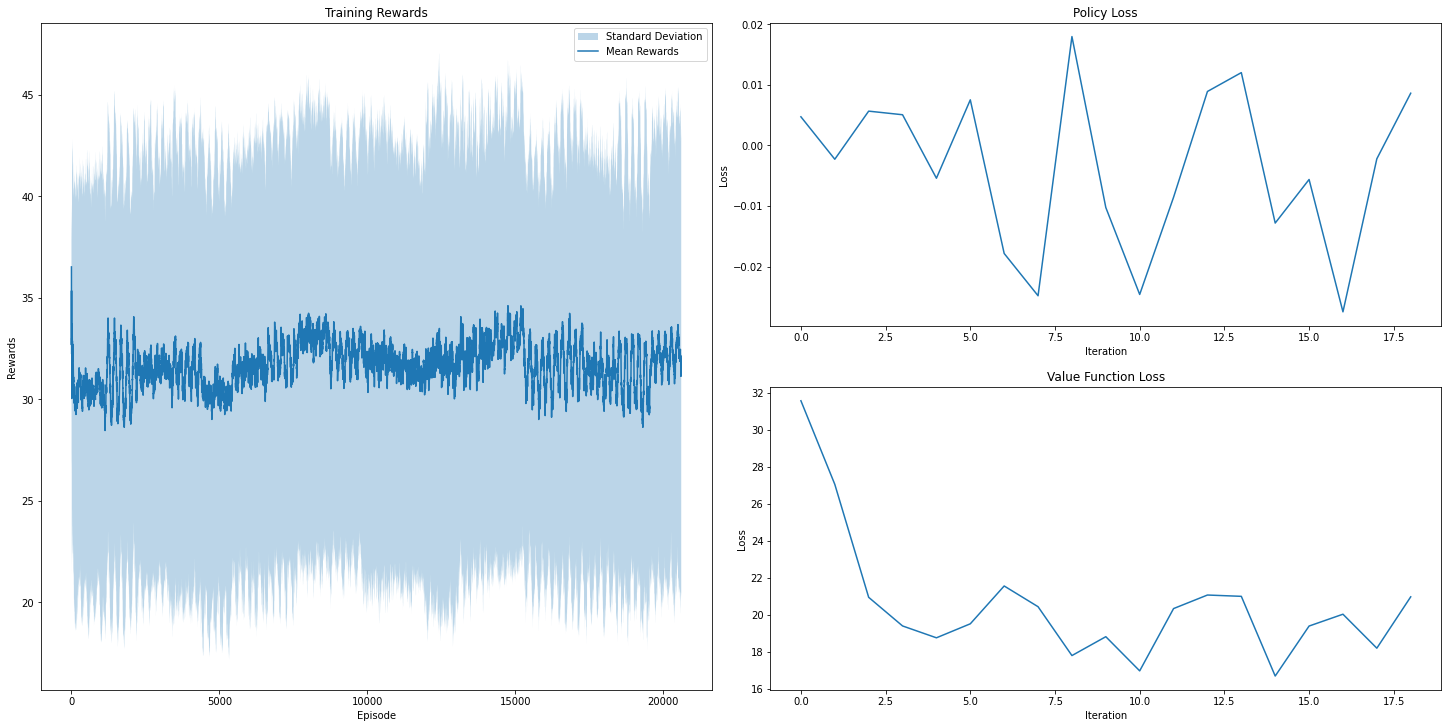

In [ ]:
plot_results(results)